In [1]:
# XXX: 发现参考的源代码有很大的问题，他用%m-%Y来索引排序明显不对啊

# 使用总市值加权计算

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

path = "./thrFactorData/STK_MKT_ThrfacDay.xlsx";
data_sample = pd.read_excel(path, skiprows=[1,2]);
data_sample.head()

# MarkettypeID [股票市场类型编码] P9705: 创业板；P9706: 综合 A 股市场；P9707: 综合 B 股市场；P9709: 综合 A 股和创业板； P9710: 综合 AB 股和创业板
# TradingDate [交易日期]
# RiskPremium1 [市场风险溢价因子(流通市值加权)] 
# RiskPremium2 [市场风险溢价因子(总市值加权)] 
# SMB1 [市值因子(流通市值加权)] 
# SMB2 [市值因子(总市值加权)] 
# HML1 [账面市值比因子(流通市值加权)] 
# HML2 [账面市值比因子(总市值加权)]




,MarkettypeID,TradingDate,RiskPremium1,RiskPremium2,SMB1,SMB2,HML1,HML2
0,P9705,2017-05-25,0.003969,0.001969,0.001325,0.001948,0.000527,-0.001420
1,P9706,2017-05-25,0.014969,0.013969,-0.005257,-0.005585,0.007817,0.007850
2,P9707,2017-05-25,0.007969,0.008969,-0.001309,-0.000926,-0.002447,-0.002153
3,P9709,2017-05-25,0.013969,0.012969,-0.005154,-0.005569,0.008083,0.007724
4,P9710,2017-05-25,0.013969,0.012969,-0.005030,-0.005441,0.007829,0.007514


In [2]:
def handleMonthR(local, Sname):
    path = "./"+local+".xlsx";
    data_temp = pd.read_excel(path, skiprows=[0,1,2,3], usecols=[0,1,2,3,4,5],
                             names=['date','t1','t2','t3','t4','r'],skipfooter=1);
    # data_temp = data_temp.replace('/','-');
    data_temp['datetime'] = pd.to_datetime(data_temp['date']);
    data_temp['date_index'] = data_temp['datetime'].apply(lambda x : x.strftime('%Y-%m'));
    data_temp.set_index('date_index',inplace=True)
    data_temp.sort_index(inplace=True)
    data_sep = data_temp.loc[:,['r']]
    data_sep.rename(columns={'r': Sname}, inplace=True)
    return data_sep

In [3]:
# 准备股票数据：
share_code = ["000002","000725","002024","600276","600848"];
share_name = ["wanke","JDFang","suning","hengrui","SHLinGang"];


data_sep = handleMonthR(share_code[0], share_name[0]);

data_sep = pd.merge(handleMonthR(share_code[1], share_name[1]), data_sep, right_index=True, left_index=True, sort=True, how='inner');
data_sep = pd.merge(handleMonthR(share_code[2], share_name[2]), data_sep, right_index=True, left_index=True, sort=True, how='inner');
data_sep = pd.merge(handleMonthR(share_code[3], share_name[3]), data_sep, right_index=True, left_index=True, sort=True, how='inner');
data_sep = pd.merge(handleMonthR(share_code[4], share_name[4]), data_sep, right_index=True, left_index=True, sort=True, how='inner');

data_sep.head()



,SHLinGang,hengrui,suning,JDFang,wanke
date_index,,,,,
2004-08,-0.098734,-0.102655,-0.016973,-0.253219,-0.061682
2004-09,0.000000,0.171598,0.132465,0.120690,0.079681
2004-10,-0.188202,0.111111,0.221695,-0.149744,-0.077491
2004-11,0.141869,-0.015152,-0.021072,0.003619,0.024000
2004-12,-0.109091,-0.040769,-0.034483,-0.280048,0.027344


In [4]:
data_sample.dropna(how="any", inplace=True);
data_sample.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13717 entries, 0 to 13879
Data columns (total 8 columns):
MarkettypeID    13717 non-null object
TradingDate     13717 non-null object
RiskPremium1    13717 non-null float64
RiskPremium2    13717 non-null float64
SMB1            13717 non-null float64
SMB2            13717 non-null float64
HML1            13717 non-null float64
HML2            13717 non-null float64
dtypes: float64(6), object(2)
memory usage: 964.5+ KB


In [5]:
data_sample['date'] = pd.to_datetime(data_sample['TradingDate']);
data_sample['date_index'] = data_sample['date'].apply(lambda x : x.strftime('%Y-%m'))
data_sample.set_index('date_index',inplace=True)
data_sample.sort_index(inplace=True)
# data_sample.drop(["TradingDate"],axis=1,inplace=True)
data_sample.head()


,MarkettypeID,TradingDate,RiskPremium1,RiskPremium2,SMB1,SMB2,HML1,HML2,date
date_index,,,,,,,,,
2005-01,P9709,2005-01-04,-0.018048,-0.019048,0.008049,0.009996,-0.001828,-0.002430,2005-01-04
2005-01,P9706,2005-01-24,0.017953,0.017953,0.003727,0.003664,-0.001440,-0.001477,2005-01-24
2005-01,P9710,2005-01-24,0.018953,0.017953,0.002766,0.002784,-0.001976,-0.001846,2005-01-24
2005-01,P9709,2005-01-24,0.017953,0.017953,0.003727,0.003664,-0.001440,-0.001477,2005-01-24
2005-01,P9709,2005-01-21,0.021953,0.023953,-0.008798,-0.009712,0.009239,0.010622,2005-01-21


In [6]:
# P9705: 创业板；P9706: 综合A股市场；P9707: 综合B股市场；P9709: 综合A股和创业板； P9710: 综合AB股和创
p9706 = data_sample.loc[data_sample["MarkettypeID"].isin(["P9706"]),["RiskPremium2","SMB2","HML2","date"]]
p9706.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3010 entries, 2005-01 to 2017-05
Data columns (total 4 columns):
RiskPremium2    3010 non-null float64
SMB2            3010 non-null float64
HML2            3010 non-null float64
date            3010 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 117.6+ KB


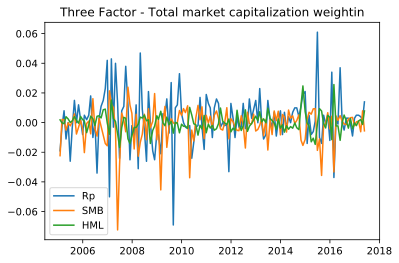

,RiskPremium2,SMB2,HML2
date_index,,,
2005-01,-0.019048,-0.022325,0.001843
2005-02,-0.003048,0.002094,-0.000198
2005-03,0.007953,0.001946,-0.000736
2005-04,-0.011048,-0.005083,0.003938
2005-05,-0.000048,-0.000119,0.002427


In [7]:
p9706['year'] = p9706['date'].apply(lambda x: x.year)
p9706['month'] = p9706['date'].apply(lambda x: x.month)
p9706['day'] = p9706['date'].apply(lambda x: x.day)
p9706 = p9706.groupby(['year', 'month']).apply(lambda t: t[t.day == t.day.max()]).reset_index(drop = True)

p9706['date_index'] = p9706['date'].apply(lambda x : x.strftime('%Y-%m'))
p9706.set_index('date_index',inplace=True)
p9706.sort_index(inplace=True)

# TODO: 不知道为什么drop year 和 month、day会删没了
# p9706 = p9706.drop(['year','month'], axis=1, inplace=True)

plt.title('Three Factor - Total market capitalization weightin')
plt.plot(p9706.values[:,3],p9706.values[:,0])
plt.plot(p9706.values[:,3],p9706.values[:,1])
plt.plot(p9706.values[:,3],p9706.values[:,2])
plt.legend(['Rp','SMB','HML'])
plt.show()

p9706 = p9706.loc[:,['RiskPremium2','SMB2','HML2']]
p9706.head()




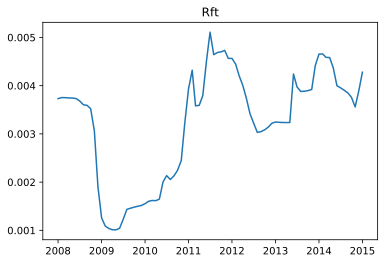

,date,rft
date_index,,
2008-01,2008-01-01,0.003731
2008-02,2008-02-01,0.003753
2008-03,2008-03-01,0.003751
2008-04,2008-04-01,0.003745
2008-05,2008-05-01,0.003743


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# 准备无风险利率df
path = "./RESSET债券－－月无风险收益率.xlsx";
data_rft = pd.read_excel(path, skiprows=[],names=['date','yy','mm','rft']);

data_rft['date_index'] = data_rft['date'].apply(lambda x : x.strftime('%Y-%m'));
data_rft.set_index('date_index',inplace=True)
data_rft.sort_index(inplace=True)

plt.title('Rft')
plt.plot(data_rft.values[:,0],data_rft.values[:,3])
plt.show()

data_rft = data_rft.loc[:,['date','rft']]
data_rft.head()


            RiskPremium2      SMB2      HML2  SHLinGang   hengrui    suning  \
date_index                                                                    
2008-01        -0.010093 -0.017793 -0.003367  -0.229595 -0.042826 -0.157384   
2008-02         0.011908  0.005541 -0.003301   0.207948 -0.058670  0.082581   
2008-03        -0.031093 -0.022678 -0.001087  -0.205784 -0.181357 -0.168298   
2008-04         0.046908 -0.013398  0.003701  -0.307885 -0.092712 -0.000846   
2008-05         0.008908 -0.007857  0.003095   0.174747  0.046502 -0.077275   

              JDFang     wanke       date       rft  
date_index                                           
2008-01    -0.096588 -0.100472 2008-01-01  0.003731  
2008-02    -0.009002 -0.111239 2008-02-01  0.003753  
2008-03    -0.046847  0.097324 2008-03-01  0.003751  
2008-04    -0.039591 -0.051792 2008-04-01  0.003745  
2008-05    -0.178195 -0.193320 2008-05-01  0.003743  


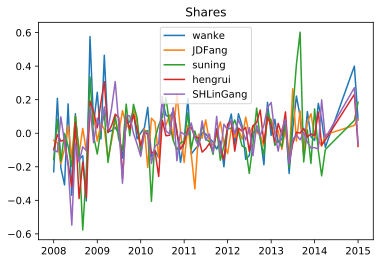

In [9]:
finalData = pd.merge(p9706, data_sep, right_index=True, left_index=True, sort=True, how='inner');
finalData = pd.merge(finalData, data_rft, right_index=True, left_index=True, sort=True, how='inner');
# finalData['wanke'] = finalData['r'] - finalData['rft'];
share_name = ["wanke","JDFang","suning","hengrui","SHLinGang"];

for i in share_name:
    finalData[i] = finalData[i] - finalData['rft'];

print(finalData.head())

plt.title('Shares')
plt.plot(finalData.values[:,8],finalData.values[:,3])
plt.plot(finalData.values[:,8],finalData.values[:,4])
plt.plot(finalData.values[:,8],finalData.values[:,5])
plt.plot(finalData.values[:,8],finalData.values[:,6])
plt.plot(finalData.values[:,8],finalData.values[:,7])
plt.legend(share_name)
plt.show()


In [10]:
finalData.corr()


,RiskPremium2,SMB2,HML2,SHLinGang,hengrui,suning,JDFang,wanke,rft
RiskPremium2,1.000000,0.172470,0.058617,0.048794,-0.124180,0.100227,0.142283,0.173350,0.057041
SMB2,0.172470,1.000000,-0.545475,0.249213,-0.066352,0.294324,0.028777,0.033532,0.058238
HML2,0.058617,-0.545475,1.000000,-0.014627,0.123145,0.016353,-0.019507,-0.053899,-0.031663
SHLinGang,0.048794,0.249213,-0.014627,1.000000,0.340859,0.541040,0.675860,0.484437,-0.164555
hengrui,-0.124180,-0.066352,0.123145,0.340859,1.000000,0.286012,0.278874,0.053066,-0.148206
suning,0.100227,0.294324,0.016353,0.541040,0.286012,1.000000,0.427826,0.312187,-0.054965
JDFang,0.142283,0.028777,-0.019507,0.675860,0.278874,0.427826,1.000000,0.624425,-0.256961
wanke,0.173350,0.033532,-0.053899,0.484437,0.053066,0.312187,0.624425,1.000000,-0.161494
rft,0.057041,0.058238,-0.031663,-0.164555,-0.148206,-0.054965,-0.256961,-0.161494,1.000000


In [11]:
import statsmodels.api as sm

x = finalData[["RiskPremium2","SMB2","HML2"]].values;
X = sm.add_constant(x);

share_name = ["wanke","JDFang","suning","hengrui","SHLinGang"];
for i in share_name:
    y = finalData[i];
    model = sm.OLS(y, X)
    results = model.fit()
    print(i)
    print(results.summary())
    print()


D:\softwar\academic\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


wanke
                            OLS Regression Results                            
Dep. Variable:                  wanke   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9139
Date:                Mon, 08 Jun 2020   Prob (F-statistic):              0.439
Time:                        14:16:21   Log-Likelihood:                 52.674
No. Observations:                  78   AIC:                            -97.35
Df Residuals:                      74   BIC:                            -87.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0109      0.015     -0.734   

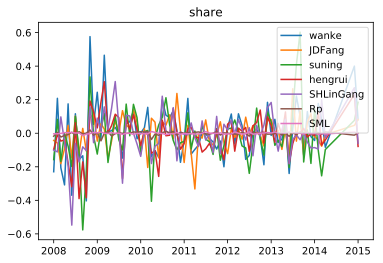

In [12]:

plt.title('share')
plt.plot(finalData.values[:,8],finalData.values[:,3])
plt.plot(finalData.values[:,8],finalData.values[:,4])
plt.plot(finalData.values[:,8],finalData.values[:,5])
plt.plot(finalData.values[:,8],finalData.values[:,6])
plt.plot(finalData.values[:,8],finalData.values[:,7])
plt.plot(finalData.values[:,8], finalData.values[:,1])
plt.plot(finalData.values[:,8], finalData.values[:,2])
plt.legend(["wanke","JDFang","suning","hengrui","SHLinGang",'Rp','SML'])
plt.show()

In [19]:
import statsmodels.api as sm

x = finalData[["RiskPremium1","SMB1"]].values;
X = sm.add_constant(x);
y = finalData['wanke'];
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  wanke   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.275
Date:                Mon, 08 Jun 2020   Prob (F-statistic):              0.285
Time:                        14:13:08   Log-Likelihood:                 52.560
No. Observations:                  78   AIC:                            -99.12
Df Residuals:                      75   BIC:                            -92.05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0087      0.014     -0.604      0.5